In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

In [3]:
song_df_1 = pd.read_csv('./data/kaggle_visible_evaluation_triplets.txt', sep='\t', header=None)
song_df_1.columns = ['user_id', 'song_id', 'listen_count']
song_df_1.head()

,user_id,song_id,listen_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [6]:
song_df_2 = pd.read_table('./data/unique_tracks.txt', sep='<SEP>', header=None)
song_df_2.columns = ['track_id', 'song_id', 'artist_name', 'title']
song_df_2.head()

,track_id,song_id,artist_name,title
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [7]:
genre = pd.read_table('./data/song_genre.cls', delimiter='\t', comment='#', header=None)
genre.columns = ['track_id','genre']
genre.head()

,track_id,genre
0,TRAAAAK128F9318786,Rock
1,TRAAAAW128F429D538,Rap
2,TRAAADJ128F4287B47,Rock
3,TRAAADZ128F9348C2E,Latin
4,TRAAAED128E0783FAB,Jazz


Text(0.5, 1.0, 'Genre Frequency Distribution')

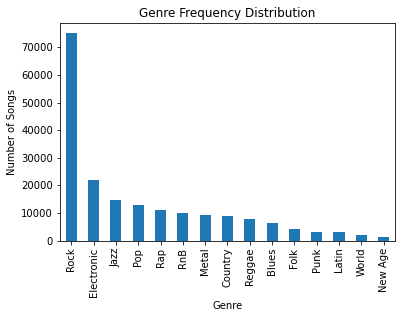

In [13]:
genre['genre'].value_counts().plot.bar()
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.title('Genre Frequency Distribution')

In [8]:
location = pd.read_table("./data/artist_location.txt", sep='<SEP>', header=None)
location.columns = ['artist_id','longitude','latitude', 'artist_name','location']
location.head()

,artist_id,longitude,latitude,artist_name,location
0,ARZGXZG1187B9B56B6,-16.96595,-61.14804,Endless Blue,Santa Cruz
1,AR8K6F31187B99C2BC,46.44231,-93.36586,Go Fish,"Twin Cities, MN"
2,ARHJJ771187FB5B581,51.59678,-0.33556,Screaming Lord Sutch,"Harrow, Middlesex, England"
3,ARJ8YLL1187FB3CA93,40.69626,-73.83301,Morton Gould,"Richmond Hill, NY"
4,ARYBAGV11ECC836DAC,43.58828,-79.64372,Crash Parallel,Mississauga


In [9]:
year = pd.read_table("./data/tracks_per_year.txt", sep='<SEP>', header=None)
year.columns = ['year','track_id','track_name','song_name']
year.head()

,year,track_id,track_name,song_name
0,1922,TRSGHLU128F421DF83,Alberta Hunter,Don't Pan Me
1,1922,TRMYDFV128F42511FC,Barrington Levy,Warm And Sunny Day
2,1922,TRRAHXQ128F42511FF,Barrington Levy,Looking My Love
3,1922,TRFAFTK12903CC77B8,Barrington Levy,Warm And Sunny Day
4,1922,TRSTBUY128F4251203,Barrington Levy,Mandela You're Free


Text(0.5, 1.0, 'Year Frequency Distribution')

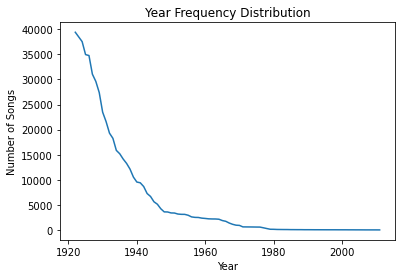

In [17]:
freq = year['year'].value_counts()
unique_year = year['year'].unique()
plt.plot(unique_year, freq)
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Year Frequency Distribution')

In [19]:
unique_year.min(), unique_year.max()

(1922, 2011)

In [28]:
song_df = pd.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on="song_id", how="left")
song_df = pd.merge(song_df, genre, on='track_id', how='left')
song_df = pd.merge(song_df, location, on='artist_name', how='left')
song_df = pd.merge(song_df, year, on='track_id', how='left')
song_df = song_df.dropna().drop(columns=['song_name','track_name'])
song_df.head()

,user_id,song_id,listen_count,track_id,artist_name,title,genre,artist_id,longitude,latitude,location,year
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One,Country,AR5E44Z1187B9A1D74,37.4817,-82.51887,"Pikeville, KY",1990.0
63,458833ce4418010e61304b34b2c992e1cce63435,SOVOGGO12A8C1433B2,1,TRDLCFS128F93306EF,Datarock,Give It Up,Electronic,ARBEOVA1187FB41C35,60.3907,5.33275,"Bergen, Norway",2009.0
68,458833ce4418010e61304b34b2c992e1cce63435,SOXXSYL12A8C14292A,1,TRRAMYW12903CC9AFF,Datarock,Amarillion,Electronic,ARBEOVA1187FB41C35,60.3907,5.33275,"Bergen, Norway",2009.0
69,458833ce4418010e61304b34b2c992e1cce63435,SOBXACU12AB01870CE,1,TRSBZBU12903CF7CB2,Datarock,Computer Camp Love,Electronic,ARBEOVA1187FB41C35,60.3907,5.33275,"Bergen, Norway",2003.0
77,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One,Country,AR5E44Z1187B9A1D74,37.4817,-82.51887,"Pikeville, KY",1990.0


In [23]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191044 entries, 0 to 1459633
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       191044 non-null  object 
 1   song_id       191044 non-null  object 
 2   listen_count  191044 non-null  int64  
 3   track_id      191044 non-null  object 
 4   artist_name   191044 non-null  object 
 5   title         191044 non-null  object 
 6   genre         191044 non-null  object 
 7   artist_id     191044 non-null  object 
 8   longitude     191044 non-null  float64
 9   latitude      191044 non-null  float64
 10  location      191044 non-null  object 
 11  year          191044 non-null  float64
 12  track_name    191044 non-null  object 
 13  song_name     191044 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 21.9+ MB


### EDA - User

In [20]:
user_freq = song_df.groupby('user_id')['listen_count'].sum().reset_index().sort_values(by='listen_count', ascending=False)
user_freq

,user_id,listen_count
2774,090b841eaf56d343a26625c2c6d08b823927bc4f,898
44766,957440a77858369fb7a6bcc6fa408fc187d5bd7b,574
34499,72e4442fb50d32acbe48252313f784c9182a0165,501
28523,5efa70adac9daff2303245322be33bc14c7361ed,452
9048,1dd2e5080f4c170c924ce1e91d3d41c1d80edc2f,440
...,...,...
41890,8bc07c0beda900cfac1951a26c4d99eca7001cf0,1
41885,8bbbb6369425f9aec27a12bfe01771524c2679ef,1
41880,8bb757727fc0f7977211b9cce157957c29415338,1
41873,8bb0e920078ca48191623565dd672ec820b11760,1


Text(0, 0.5, 'Number of Users')

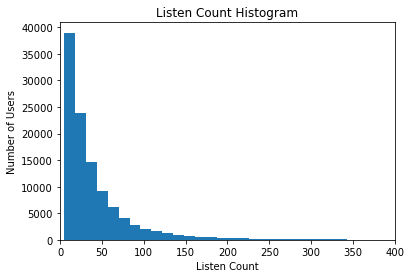

In [27]:
user_freq = song_df.groupby('user_id')['listen_count'].sum().reset_index()
user_freq['listen_count'].hist(bins=100)
plt.grid(False)
plt.xlim(0, 400)
plt.title('Listen Count Histogram')
plt.xlabel('Listen Count')
plt.ylabel('Number of Users')

In [10]:
user_freq.loc[2006]

user_id         04a4e9ae79fee7889a9d698c489590d78302e61b
listen_count                                          36
Name: 2006, dtype: object

In [16]:
song_df[song_df.user_id=='04a4e9ae79fee7889a9d698c489590d78302e61b'].sort_values(by='listen_count', ascending=False)[['title', 'genre','artist_name', 'listen_count']]

,title,genre,artist_name,listen_count
1357110,Just A Man,Rock,Faith No More,10


### Content-based Recommendation
predicts what a user like based on what that user like in the past

In [29]:
le = preprocessing.LabelEncoder()
song_df['genre_id'] = le.fit_transform(song_df['genre'])
song_df['genre_id']

0           1
63          2
68          2
69          2
77          1
           ..
1459568     2
1459575    13
1459608    13
1459626    11
1459633    13
Name: genre_id, Length: 191044, dtype: int32

In [39]:
train_data, test_data = train_test_split(song_df, test_size = 0.3, random_state=1)

In [31]:
number_cols = ['genre_id', 'longitude', 'latitude', 'year']

In [47]:
song_data = train_data.groupby('song_id')['song_id','title','artist_name', 'genre', 'genre_id', 'longitude', 'latitude', 'location', 'year'].head(1)

scaler = StandardScaler()
scaler.fit(song_data[number_cols])

StandardScaler()

In [44]:
song_data.head()

,song_id,title,artist_name,genre,genre_id,longitude,latitude,location,year
676102,SOBONKR12A58A7A7E0,You're The One,Dwight Yoakam,Country,1,37.48170,-82.51887,"Pikeville, KY",1990.0
1080761,SOUKOZK12A8C13CDD6,The Letter,Xavier Rudd,Folk,3,-36.55865,145.46900,"Victoria, Australia",2005.0
941758,SORDHDA12AB0186828,Take Care,Beach House,Rock,13,39.29055,-76.60960,B-More,2010.0
712824,SOOFYTN12A6D4F9B35,Représente,Alliance Ethnik,Rap,10,49.25953,2.47547,"Creil, France",1999.0
1252688,SOCHTHF12AB017E206,Don't Start Me Talkin',Sonny Boy Williamson,Blues,0,33.84005,-90.29717,"Glendora, MS",2004.0


In [33]:
def get_song_list(user_id):
    
    """
    Gets the information of previous songs that a user has listened to.
    """
        
    song_id_list = song_df[song_df['user_id'] == user_id]['song_id'].tolist()
    return song_data[song_data['song_id'].isin(song_id_list)]

In [34]:
def get_mean_vector(user_id):
  
    """
    Gets the mean vector for a list of songs.
    """
    
    song_vectors = song_df[song_df['user_id'] == user_id][number_cols] 
    song_vectors['genre_id'] = song_df[song_df['user_id'] == user_id]['genre_id'].mode()[0] # for genre, recommend the mode
    song_matrix = np.array(song_vectors)
    return np.mean(song_matrix, axis=0)

In [79]:
def recommend_songs(user_id, n_songs=10):
  
    """
    Recommends songs based on a list of previous songs that a user has listened to.
    """
    song_history = song_df[song_df['user_id'] == user_id]['song_id']
    song_list = song_history.tolist()
    
    song_center = get_mean_vector(user_id)
    scaled_data = scaler.transform(song_data[~song_data.song_id.isin(song_list)][number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = song_data[~song_data.song_id.isin(song_list)].iloc[index]
    rec_songs['distance'] = distances[0][index]
    rec_songs['rank'] = rec_songs['distance'].rank(ascending=True, method='first')
    return rec_songs

In [42]:
get_song_list('fd50c4007b68a3737fe052d5a4f78ce8aa117f3d')

,song_id,title,artist_name,genre,genre_id,longitude,latitude,location,year
676102,SOBONKR12A58A7A7E0,You're The One,Dwight Yoakam,Country,1,37.4817,-82.51887,"Pikeville, KY",1990.0


In [82]:
%%time
recommend_songs('fd50c4007b68a3737fe052d5a4f78ce8aa117f3d')[['title','artist_name','distance','rank']]

Wall time: 105 ms


,title,artist_name,distance,rank
1436248,Never Ending Song Of Love,Crystal Gayle,0.000052,1.0
836786,I'm in Love Again,George Morgan,0.001660,2.0
1187462,Western Girls,Marty Stuart,0.001849,3.0
566683,Hillbilly Rock,Marty Stuart,0.001849,4.0
854760,Rub It In,Billy Crash Craddock,0.001913,5.0
198154,Statue Of A Fool,Jack Greene,0.001977,6.0
610243,Don't Close Your Eyes,Keith Whitley,0.003293,7.0
597814,I'm No Stranger To The Rain,Keith Whitley,0.003293,8.0
157089,Watch Me Fall,Uncle Tupelo,0.003305,9.0
1210301,No Substitute,John Lee Hooker,0.003448,10.0
